# [Dataset](https://www.kaggle.com/datasets/juledz/heart-attack-prediction?resource=download)

Categorias do dataset:
| Categoria  | Significado                                           |    Tipo           | Valores |
| ---        |     ---                                               | ---               | ---     |
| `age`      | Idade                                                 | Numérico          | 29 - 77 |
| `sex`      | Sexo                                                  | Categórico        | 0 - Feminino <br> 1 - Masculino |
| `cp`       | Tipo de Dor no Peito                                  | Categórico        | 0 - Angina Típica <br> 1 - Angina Atípica <br> 2 - Dor Não Anginosa <br> 3 - Assintomática |
| `trestbps` | Pressão Arterial em Repouso                           | Numérico          | 94 - 200 |
| `chol`     | Colesterol Sérico                                     | Numérico em mg/dL | 126 - 564 |
| `fbs`      | Açúcar no Sangue em Jejum                             | Categórico        | 0 - <= 120 mg/dL <br> 1 - > 120 mg/dL |
| `restecg`  | Resultados Eletrocardiográficos em Repouso            | Categórico        | 0 - Normal <br> 1 - Anormal <br> 2 - Hipertrofia |
| `thalach`  | Frequência Cardíaca Máxima Alcançada                  | Numérico          | 71 - 202 |
| `exang`    | Angina Induzida por Exercício                         | Categórico        | 0 - Não <br> 1 - Sim |
| `oldpeak`  | Oldpeak (ST Depression)                               | Numérico          | 0.0 - 6.2 |
| `slope`    | Slope of Peak Exercise ST Segment                     | Categórico        | 0 - Subindo <br> 1 - Plano <br> 2 - Declive |
| `ca`       | Número de Vasos Principais Coloridos por Fluoroscopia | Numérico          | 0 - 3 |
| `thal`     | Talassemia                                            | Categórico        | 0 - Normal <br> 1 - Fixed Defect <br> 2 - Reversible Defect |

## Imports

In [18]:
# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Classification Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Tools to evaluate the models
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    accuracy_score, classification_report, confusion_matrix
)

# Graphic things
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
import pandas as pd

# Import dataset
df = pd.read_csv("heart.csv")

## Dataset Overview

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [13]:
def plot(y_test, prediction):
    plt.figure(figsize=(3, 3))
    plt.scatter(y_test, y_test, color='blue', label='Valor Real')
    plt.scatter(y_test, prediction, color='red', label='Valor Previsto')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.tight_layout()
    plt.show()

## Data Visualization

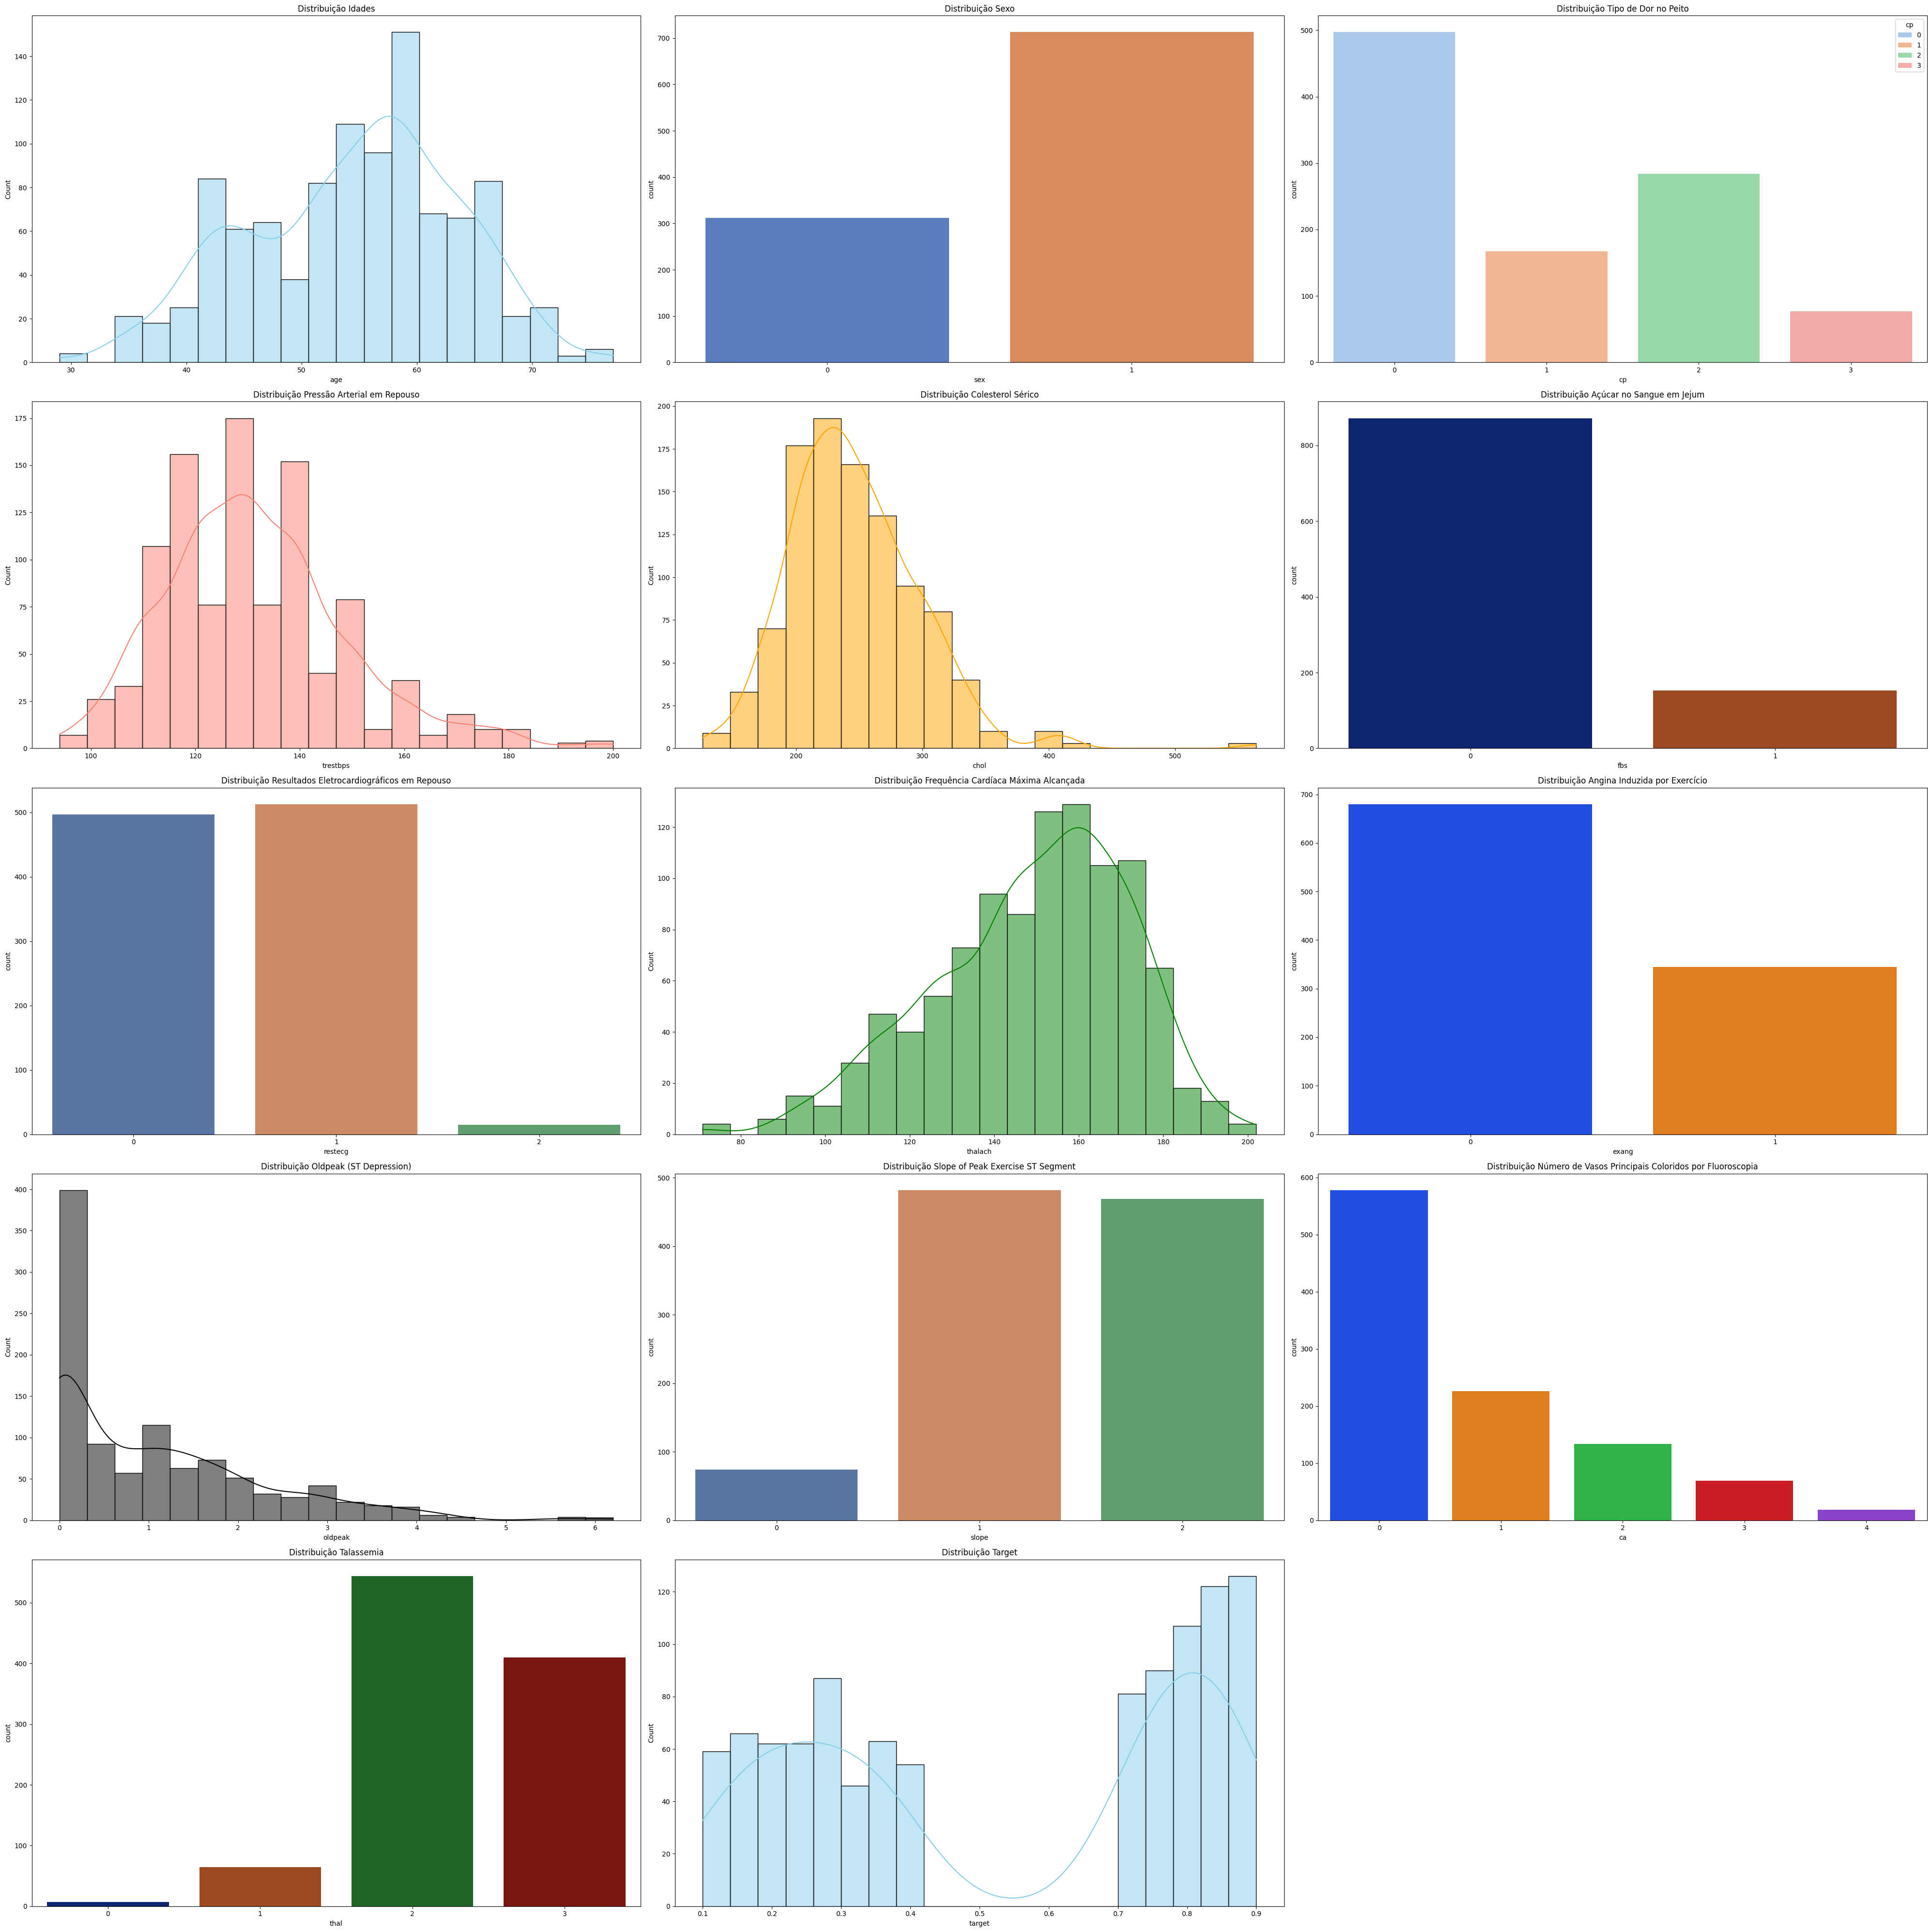

In [49]:
plt.figure(figsize=(40, 40))

# age Distribution
plt.subplot(5, 3, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição Idades')

# sex Distribution
plt.subplot(5, 3, 2)
ax = sns.countplot(x='sex', hue='sex', data=df, palette='muted')
ax.legend().set_visible(False)
plt.title('Distribuição Sexo')

# cp Distribution
plt.subplot(5, 3, 3)
ax = sns.countplot(x='cp', hue='cp', data=df, palette='pastel')
plt.title('Distribuição Tipo de Dor no Peito')

# trestbps Distribution
plt.subplot(5, 3, 4)
sns.histplot(df['trestbps'], bins=20, kde=True, color='salmon')
plt.title('Distribuição Pressão Arterial em Repouso')

# chol Distribution
plt.subplot(5, 3, 5)
sns.histplot(df['chol'], bins=20, kde=True, color='orange')
plt.title('Distribuição Colesterol Sérico')

# fbs Distribution
plt.subplot(5, 3, 6)
ax = sns.countplot(x='fbs', hue='fbs', data=df, palette='dark')
ax.legend().set_visible(False)
plt.title('Distribuição Açúcar no Sangue em Jejum')

# restecg Distribution
plt.subplot(5, 3, 7)
ax = sns.countplot(x='restecg', hue='restecg', data=df, palette='deep')
ax.legend().set_visible(False)
plt.title('Distribuição Resultados Eletrocardiográficos em Repouso')

# thalach Distribution
plt.subplot(5, 3, 8)
sns.histplot(df['thalach'], bins=20, kde=True, color='green')
plt.title('Distribuição Frequência Cardíaca Máxima Alcançada')

# exang Distribution
plt.subplot(5, 3, 9)
ax = sns.countplot(x='exang', hue='exang', data=df, palette='bright')
ax.legend().set_visible(False)
plt.title('Distribuição Angina Induzida por Exercício')

# oldpeak Distribution
plt.subplot(5, 3, 10)
sns.histplot(df['oldpeak'], bins=20, kde=True, color='black')
plt.title('Distribuição Oldpeak (ST Depression)')

# slope Distribution
plt.subplot(5, 3, 11)
ax = sns.countplot(x='slope', hue='slope', data=df, palette='deep')
ax.legend().set_visible(False)
plt.title('Distribuição Slope of Peak Exercise ST Segment')

# ca Distribution
plt.subplot(5, 3, 12)
ax = sns.countplot(x='ca', hue='ca', data=df, palette='bright')
ax.legend().set_visible(False)
plt.title('Distribuição Número de Vasos Principais Coloridos por Fluoroscopia')

# thal Distribution
plt.subplot(5, 3, 13)
ax = sns.countplot(x='thal', hue='thal', data=df, palette='dark')
ax.legend().set_visible(False)
plt.title('Distribuição Talassemia')

# target Distribution
plt.subplot(5, 3, 14)
sns.histplot(df['target'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição Target')

plt.tight_layout()
plt.show()

# Regression (Holdout)

## Working With Duplicates

### Encontrar as correlações com relação à `target`

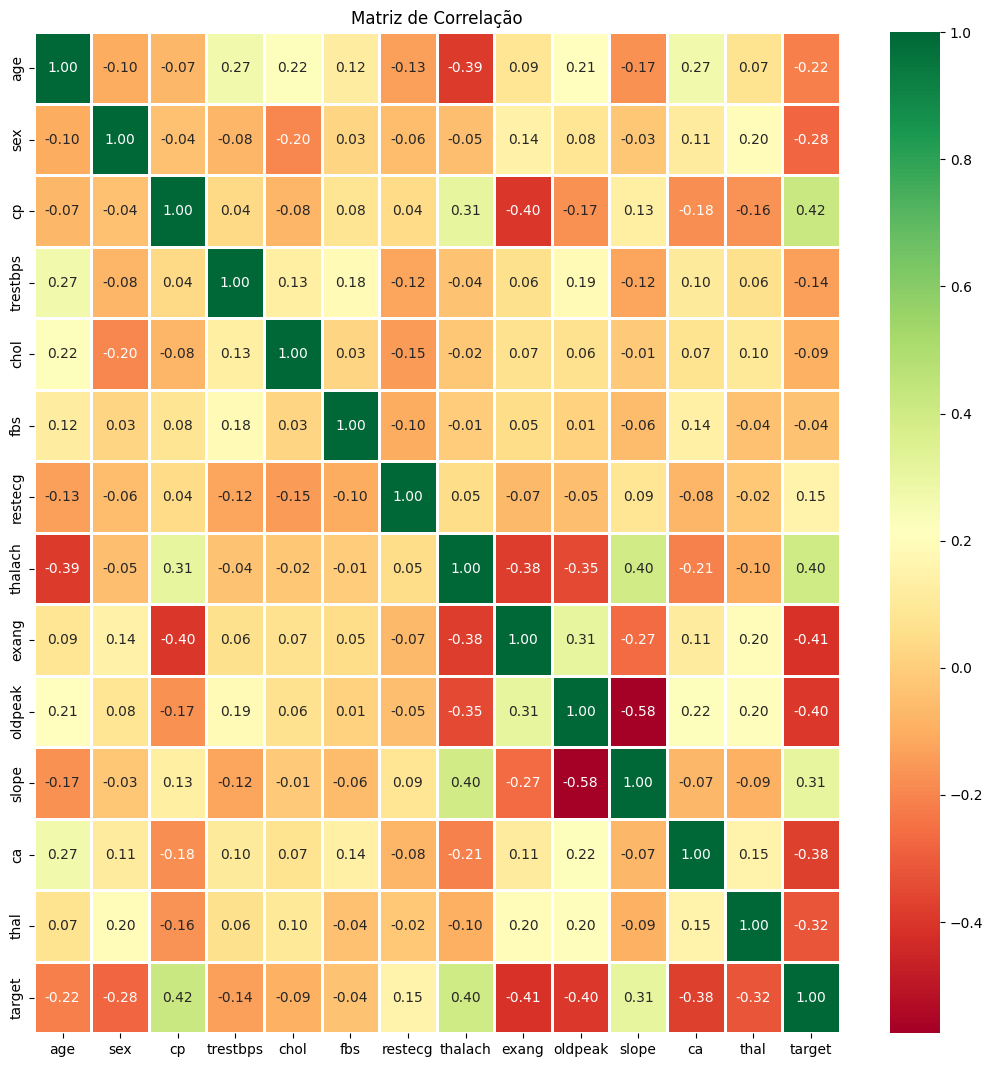

In [2]:
dataset = df

corr = dataset.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.8)
plt.title('Matriz de Correlação')
plt.show()

In [3]:
# Split the data in target and value
X = dataset.iloc[:, :13]
y = dataset.iloc[:, 13]

# Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Removing Duplicates

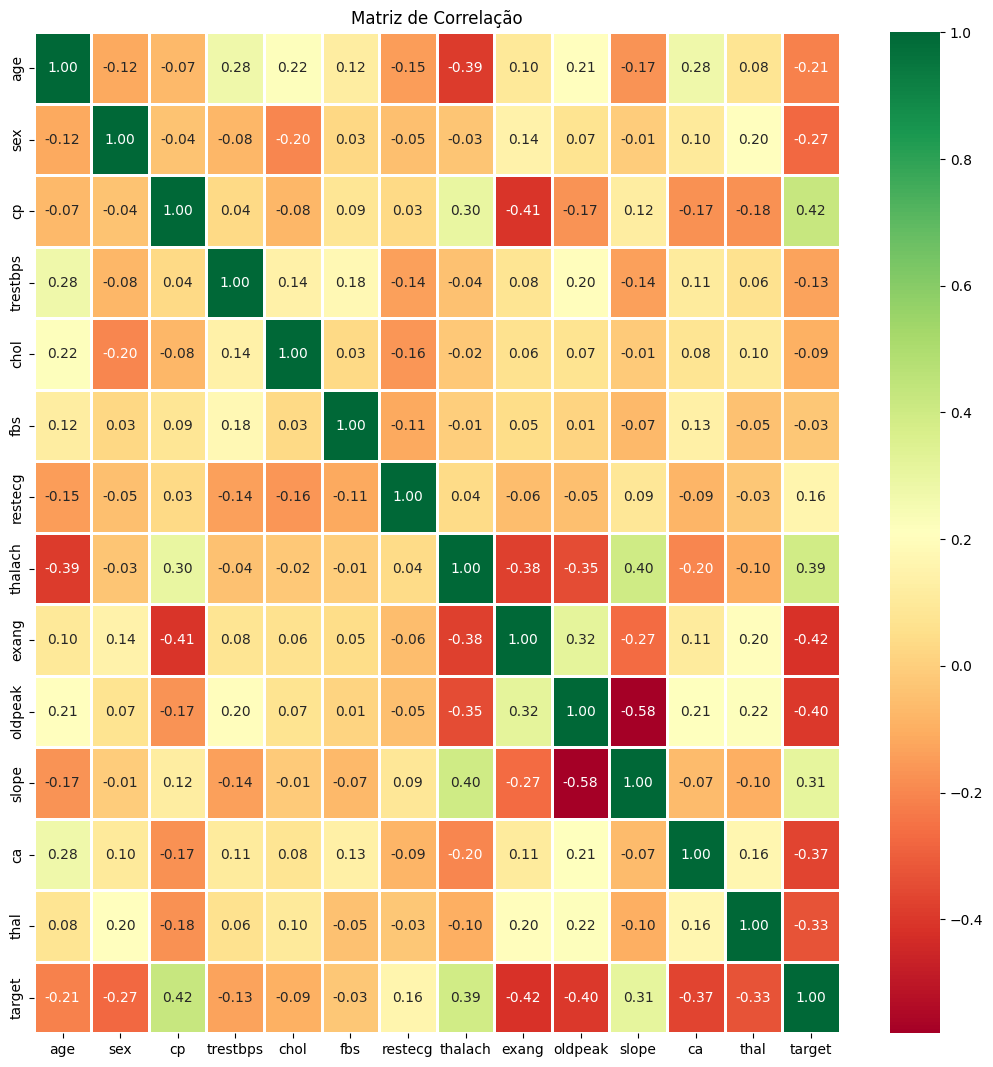

In [58]:
dataset = df.drop_duplicates()

corr = dataset.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.8)
plt.title('Matriz de Correlação')
plt.show()

In [59]:
# Split the data in target and value
X = dataset.iloc[:, :13]
y = dataset.iloc[:, 13]

# Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining Models

In [4]:
models = [
    LinearRegression(), 
    KNeighborsRegressor(n_neighbors=6, algorithm='auto', leaf_size=50),
    RandomForestRegressor(n_estimators=100, max_depth=5),
    SVR(kernel='rbf', gamma='scale', epsilon=0.1, C=0.1),
    DecisionTreeRegressor(splitter='best'),
    AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='linear', random_state=42),
]

model_names = [
    'Linear Regression',
    'K Nearest Neighbors',
    'Random Forests',
    'Support Vector Machines',
    'Decision Trees',
    'Adaptative Boosting',
]

## Iterate over models and plot them

####################
LINEAR REGRESSION
Mean Squared Error = 0.0531
Absolute Error = 0.182


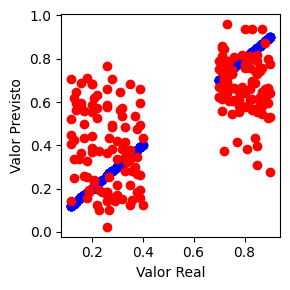

####################
K NEAREST NEIGHBORS
Mean Squared Error = 0.0624
Absolute Error = 0.1984


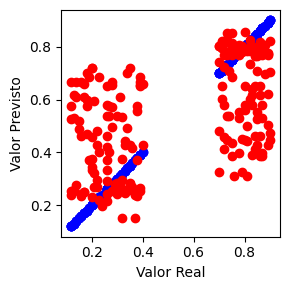

####################
RANDOM FORESTS
Mean Squared Error = 0.0342
Absolute Error = 0.1299


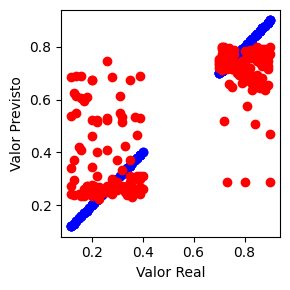

####################
SUPPORT VECTOR MACHINES
Mean Squared Error = 0.071
Absolute Error = 0.2289


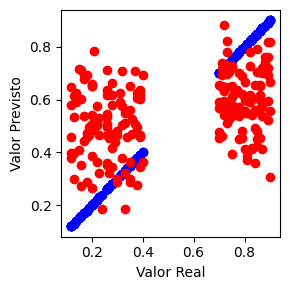

####################
DECISION TREES
Mean Squared Error = 0.0116
Absolute Error = 0.0797


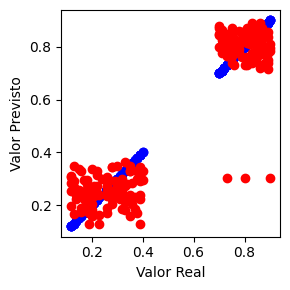

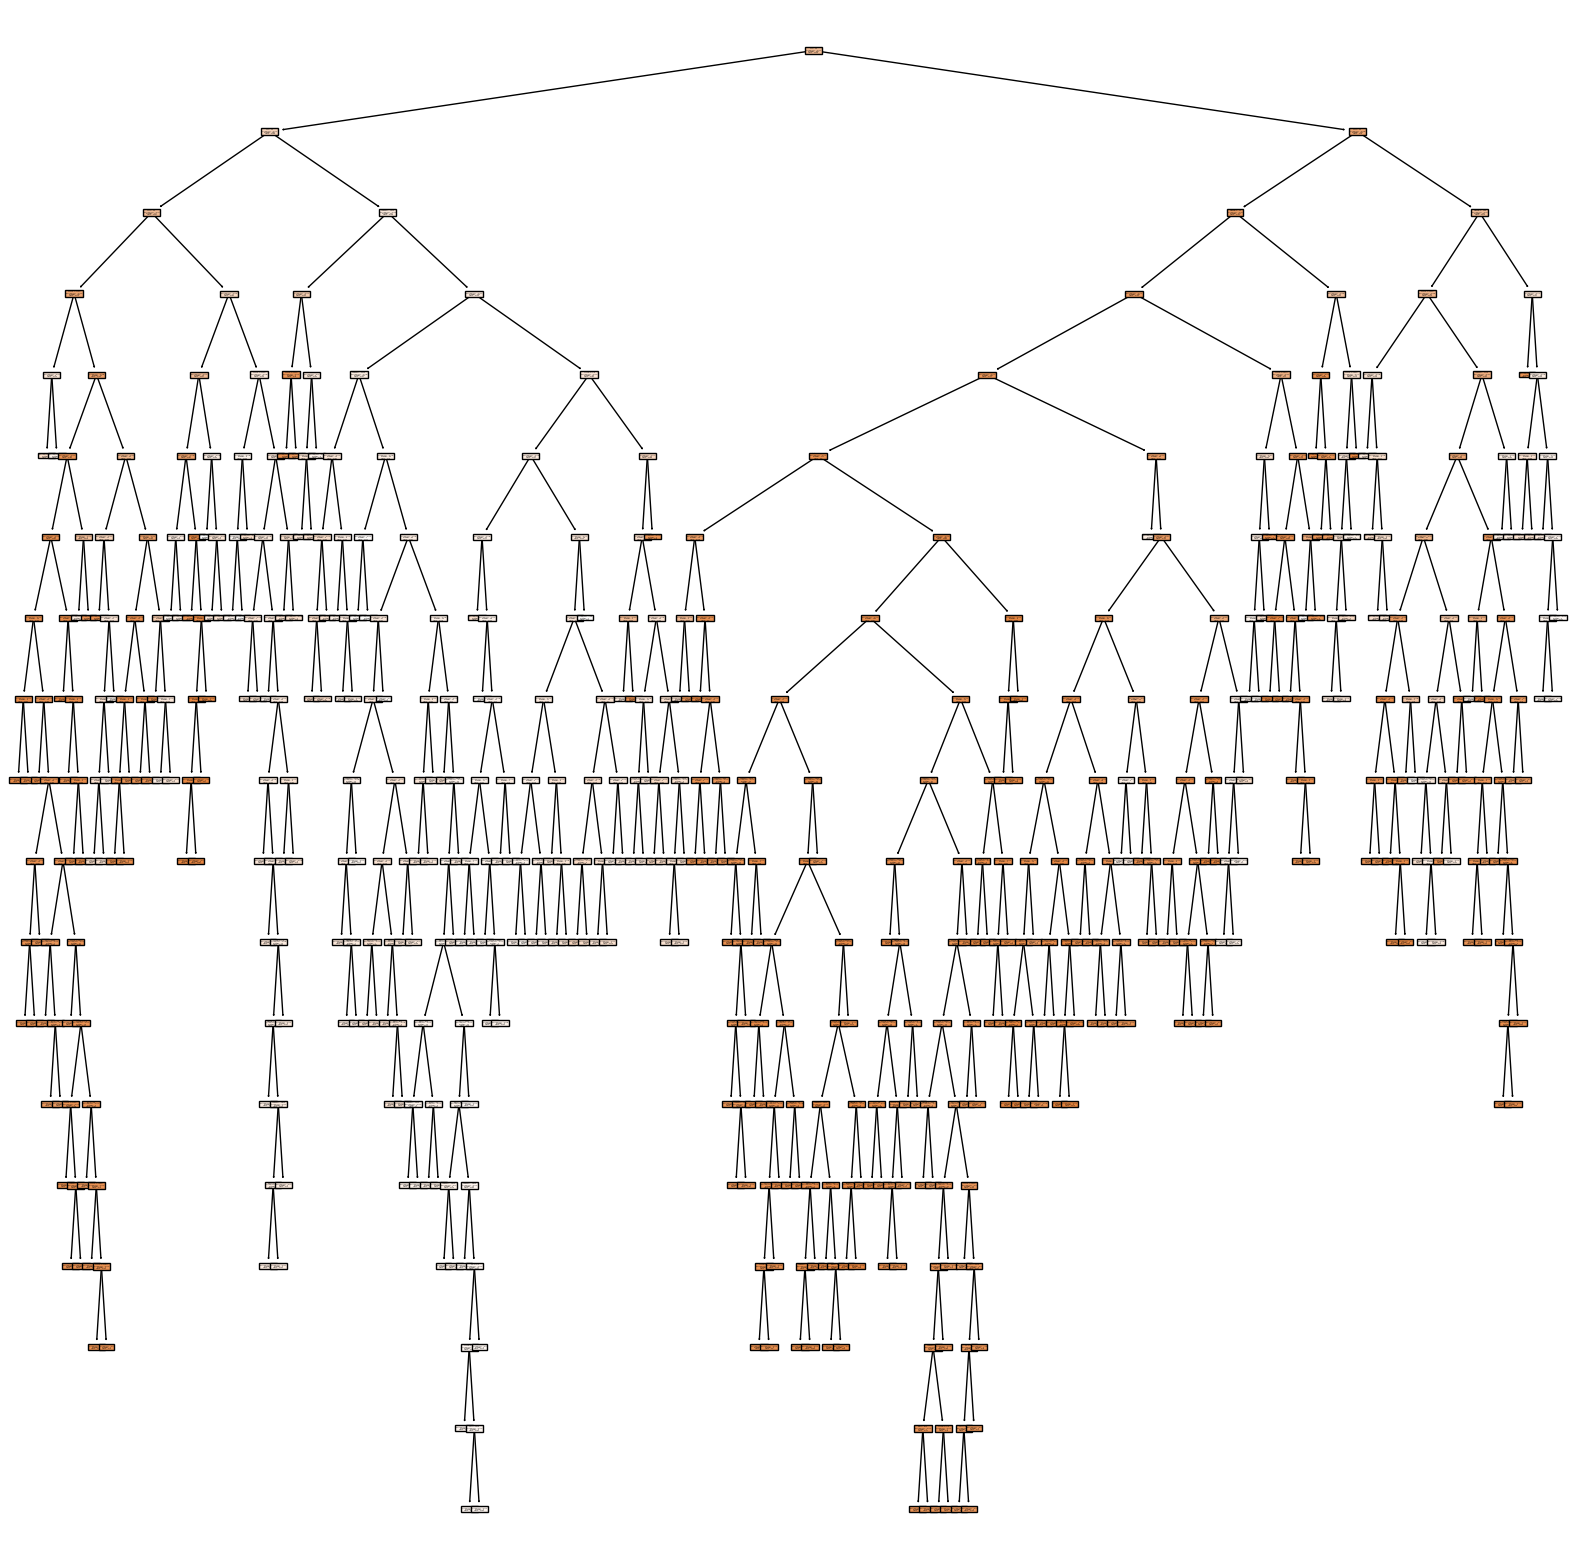

####################
ADAPTATIVE BOOSTING
Mean Squared Error = 0.0424
Absolute Error = 0.1583


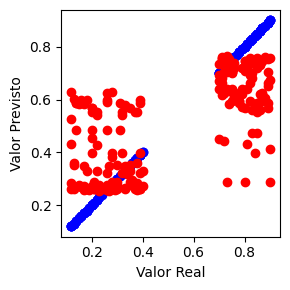

In [21]:
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    print("#"*20)
    print(f"{model_names[i].upper()}")
    print(f"Mean Squared Error = {round(mean_squared_error(y_test,prediction), 4)}")
    print(f"Absolute Error = {round(mean_absolute_error(y_test, prediction), 4)}")
    
    plot(y_test, prediction)
    
    if model_names[i] == 'Decision Trees':
        plt.figure(figsize=(20,20))
        plot_tree(model, filled=True, feature_names=list(X.columns))
        plt.savefig('decision_tree_recursion_holdout.svg', format='svg')
        plt.show()

## Create dataset for new predictions

In [63]:
new_data = [
    [20, 1, 1, 140, 200, 1, 0, 150, 1, 0.5, 2, 4, 2],
    [30, 0, 2, 150, 215, 2, 1, 170, 0, 2.0, 2, 1, 3],
    [40, 0, 2, 145, 200, 0, 2, 190, 0, 2.5, 2, 3, 3]
]

function = lambda x: 'Ataque Cardíaco' if x > 0.75 else 'Sem Ataque Cardíaco'

print("#"*40)
for i, model in enumerate(models):
    new_dataset = pd.DataFrame(
        data=new_data,
        columns=[
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal'
        ]
    )

    new_dataset['target'] = models[i].predict(new_dataset)
    new_dataset['Ataque'] = new_dataset['target'].apply(function)

    print(model_names[i].upper())
    print(new_dataset[['target', 'Ataque']].head())
    print("#"*40)

########################################
LINEAR REGRESSION
     target               Ataque
0  0.307215  Sem Ataque Cardíaco
1  0.698053  Sem Ataque Cardíaco
2  0.638334  Sem Ataque Cardíaco
########################################
K NEAREST NEIGHBORS
     target               Ataque
0  0.776667      Ataque Cardíaco
1  0.526667  Sem Ataque Cardíaco
2  0.791667      Ataque Cardíaco
########################################
RANDOM FORESTS
     target               Ataque
0  0.663642  Sem Ataque Cardíaco
1  0.560785  Sem Ataque Cardíaco
2  0.450294  Sem Ataque Cardíaco
########################################
SUPPORT VECTOR MACHINES
     target               Ataque
0  0.597969  Sem Ataque Cardíaco
1  0.666086  Sem Ataque Cardíaco
2  0.773443      Ataque Cardíaco
########################################
DECISION TREES
   target               Ataque
0  0.7825      Ataque Cardíaco
1  0.1500  Sem Ataque Cardíaco
2  0.1500  Sem Ataque Cardíaco
########################################
ADAPTATIVE

# Classification (Holdout)

In [22]:
dataset_classification = df

heart_attack = 0.75
dataset_classification['target'] = dataset_classification['target'].apply(
    lambda x: 1 if x >= heart_attack else 0
)

dataset_classification.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
539,64,1,3,170,227,0,0,155,0,0.6,1,0,3,0
416,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
164,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
362,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
235,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
545,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
852,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
333,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
274,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1


## Working with duplicates

In [23]:
# Split the data in target and value
X = dataset_classification.iloc[:, :13]
y = dataset_classification.iloc[:, 13]

# Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Removing Duplicates

In [69]:
dataset = df.drop_duplicates()

# Split the data in target and value
X = dataset.iloc[:, :13]
y = dataset.iloc[:, 13]

# Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining Models

In [24]:
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

model_names = [
    'Logistic Regression',
    'Random Forest Classifier',
    'Decision Tree Classifier'
]

## Iterate over models and plot them

############################################################
                    LOGISTIC REGRESSION                     
Accuracy: 0.6948
Confusion Matrix: 
[[135  60]
 [ 34  79]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       195
           1       0.57      0.70      0.63       113

    accuracy                           0.69       308
   macro avg       0.68      0.70      0.68       308
weighted avg       0.71      0.69      0.70       308

############################################################
                  RANDOM FOREST CLASSIFIER                  
Accuracy: 0.8084
Confusion Matrix: 
[[162  33]
 [ 26  87]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       195
           1       0.72      0.77      0.75       113

    accuracy                           0.81       308
   macro avg       0.79      0.80      0.80  

C:\Users\Arthur\AppData\Local\Temp\ipykernel_4536\1924043163.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


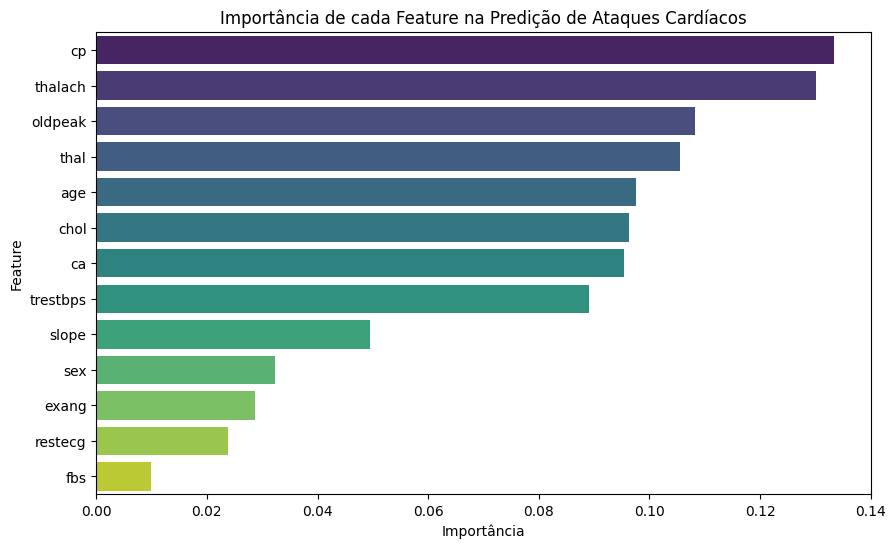

C:\Users\Arthur\AppData\Local\Temp\ipykernel_4536\1924043163.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


############################################################
                  DECISION TREE CLASSIFIER                  
Accuracy: 0.7922
Confusion Matrix: 
[[168  27]
 [ 37  76]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       195
           1       0.74      0.67      0.70       113

    accuracy                           0.79       308
   macro avg       0.78      0.77      0.77       308
weighted avg       0.79      0.79      0.79       308



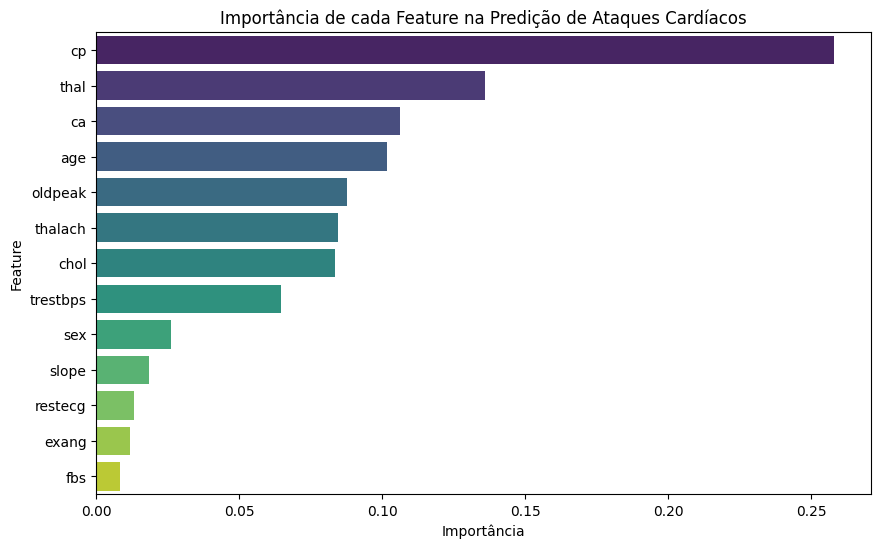

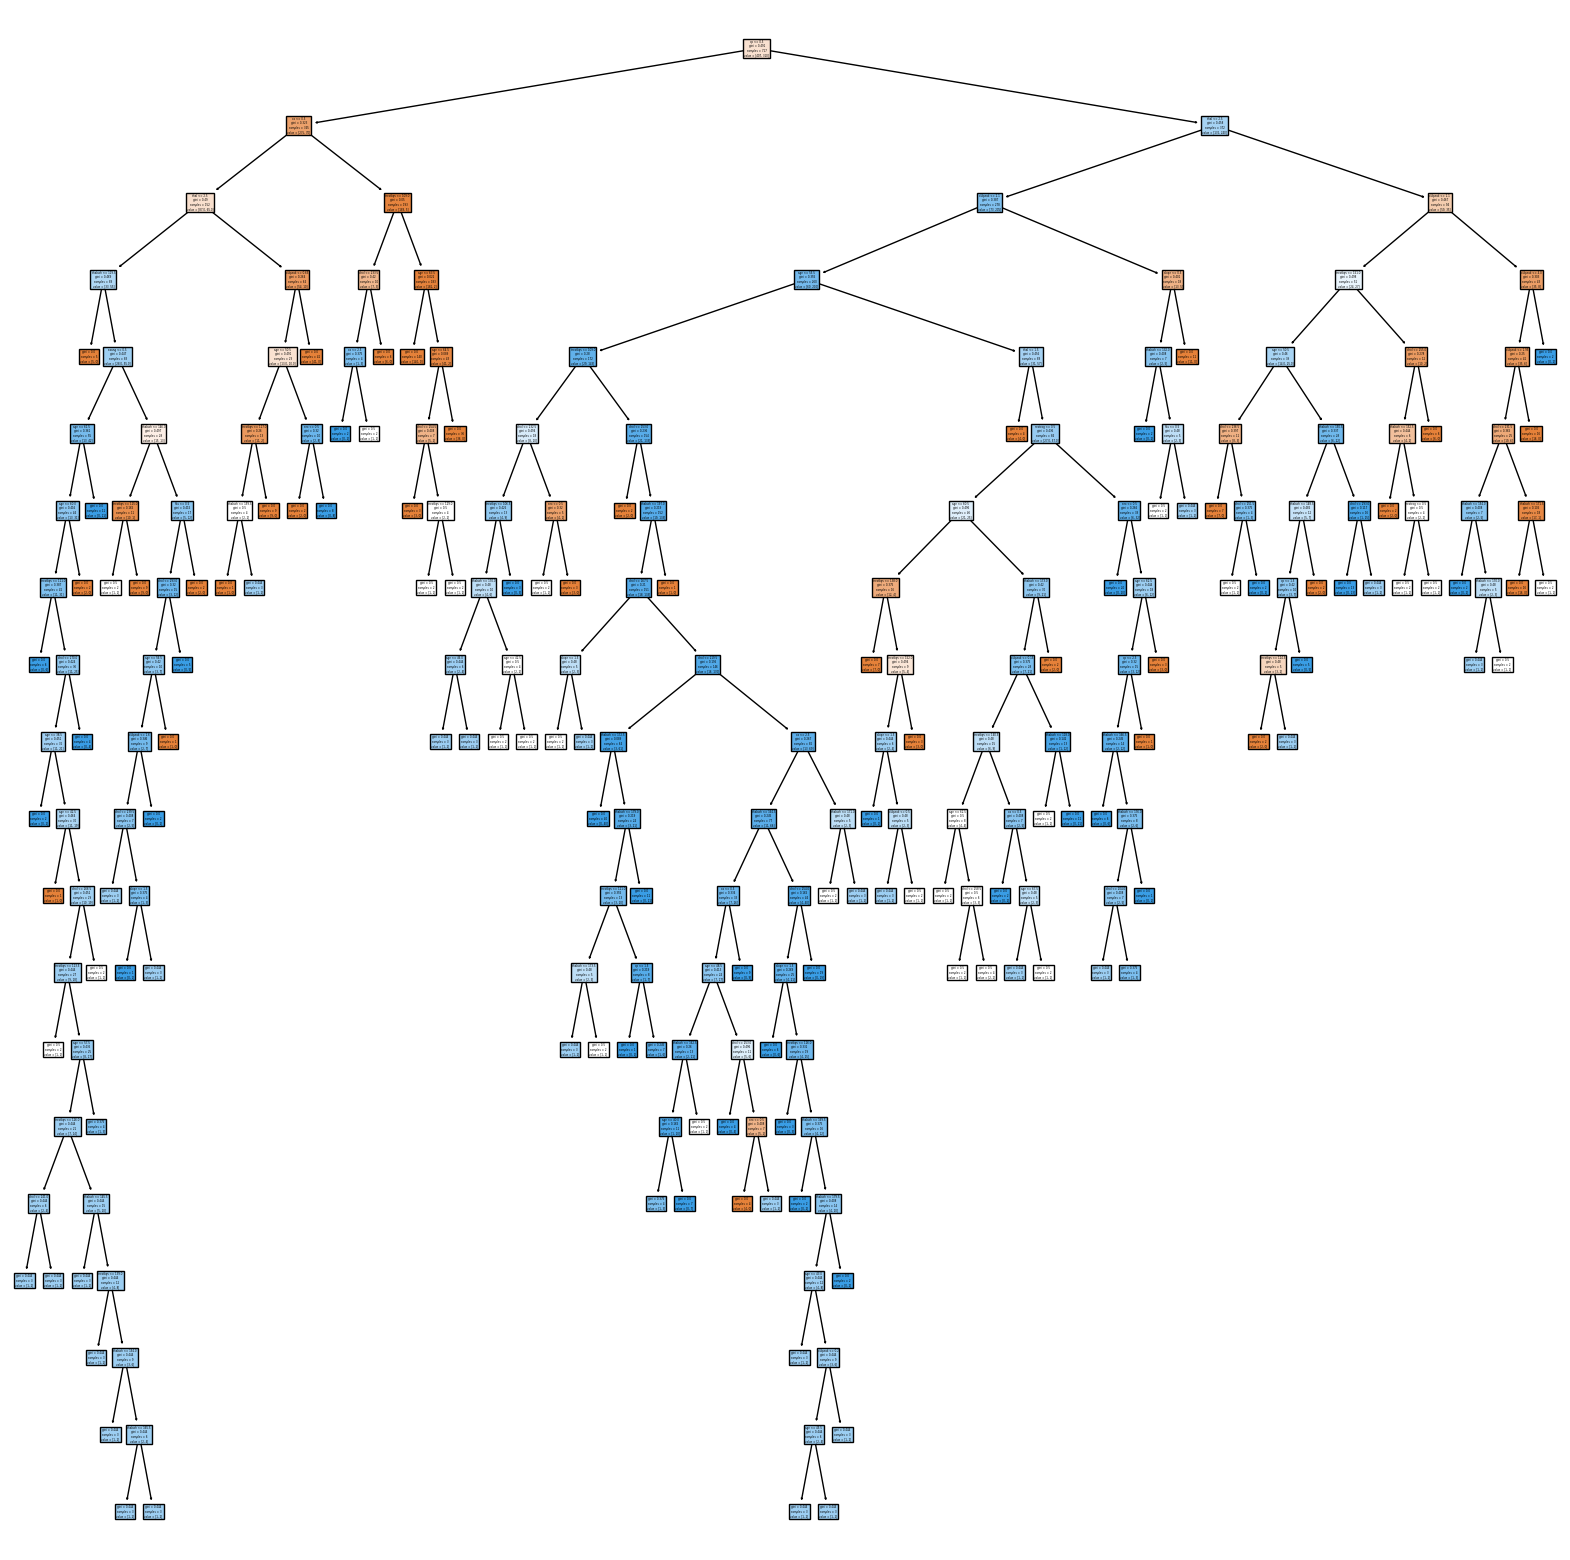

############################################################


In [25]:
for i, model in enumerate(models):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    logistic = model_names[i] == 'Logistic Regression'
    if logistic:
        # Standardize features (optional but can be beneficial for logistic regression)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
    
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, prediction)
    conf_matrix = confusion_matrix(y_test, prediction)
    class_report = classification_report(y_test, prediction)
    
    
    print("#"*60)
    print(f"{model_names[i].upper():^60}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix: \n{conf_matrix}")
    print(f"Classification Report: \n{class_report}")
    
    if not logistic:
        features_importances = model.feature_importances_
        features_names = X.columns
        
        features_importances_df = pd.DataFrame({
            'Feature': features_names, 
            'Importance': features_importances
        })
        features_importances_df = features_importances_df.sort_values(
            by='Importance', ascending=False
        )
        
        plt.figure(figsize=(10,6))
        sns.barplot(
            x='Importance', y='Feature', data=features_importances_df, palette='viridis'
        )
        plt.title('Importância de cada Feature na Predição de Ataques Cardíacos')
        plt.xlabel('Importância')
        plt.ylabel('Feature')
        plt.show()
    
    if model_names[i] == 'Decision Tree Classifier':
        plt.figure(figsize=(20,20))
        plot_tree(model, filled=True, feature_names=list(X.columns))
        plt.savefig('decision_tree_classifier_holdout.svg', format='svg')
        plt.show()
    
print("#"*60)

## Create dataset for new predictions

In [68]:
new_data = [
    [20, 1, 1, 140, 200, 1, 0, 150, 1, 0.5, 2, 4, 2],
    [30, 0, 2, 150, 215, 2, 1, 170, 0, 2.0, 2, 1, 3],
    [40, 0, 2, 145, 200, 0, 2, 190, 0, 2.5, 2, 3, 3]
]

function = lambda x: 'Ataque Cardíaco' if x == 1 else 'Sem Ataque Cardíaco'

print("#"*40)
for i, model in enumerate(models):
    new_dataset = pd.DataFrame(
        data=new_data,
        columns=[
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal'
        ]
    )

    new_dataset['target'] = models[i].predict(new_dataset)
    new_dataset['Ataque'] = new_dataset['target'].apply(function)

    print(f'{model_names[i].upper():^40}')
    print(new_dataset[['target', 'Ataque']].head())
    print("#"*40)

########################################
          LOGISTIC REGRESSION           
   target               Ataque
0       0  Sem Ataque Cardíaco
1       1      Ataque Cardíaco
2       1      Ataque Cardíaco
########################################
        RANDOM FOREST CLASSIFIER        
   target               Ataque
0       0  Sem Ataque Cardíaco
1       0  Sem Ataque Cardíaco
2       0  Sem Ataque Cardíaco
########################################
        DECISION TREE CLASSIFIER        
   target               Ataque
0       1      Ataque Cardíaco
1       0  Sem Ataque Cardíaco
2       0  Sem Ataque Cardíaco
########################################


c:\Users\Arthur\Desktop\Nova pasta\Trab1-MachineLearning\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Regression (Leave-one-out)

## Removing Duplicates

In [26]:
dataset_regression_one_out = df.drop_duplicates()

In [27]:
X = dataset_regression_one_out.iloc[:, :13]
y = dataset_regression_one_out.iloc[:, 13]

## Defining Models

In [28]:
models = [
    LinearRegression(), 
    KNeighborsRegressor(n_neighbors=6, algorithm='auto', leaf_size=50),
    RandomForestRegressor(n_estimators=100, max_depth=5),
    SVR(kernel='rbf', gamma='scale', epsilon=0.1, C=0.1),
    DecisionTreeRegressor(splitter='best'),
    AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='linear', random_state=42),
]

model_names = [
    'Linear Regression',
    'K Nearest Neighbors',
    'Random Forests',
    'Support Vector Machines',
    'Decision Trees',
    'Adaptative Boosting',
]

## Iterate over models and plot them

########################################
           LINEAR REGRESSION            
Mean Squared Error = 0.2153
Absolute Error = 0.464
########################################
          K NEAREST NEIGHBORS           
Mean Squared Error = 0.4444
Absolute Error = 0.6667
########################################
             RANDOM FORESTS             
Mean Squared Error = 0.4021
Absolute Error = 0.6341
########################################
        SUPPORT VECTOR MACHINES         
Mean Squared Error = 0.0109
Absolute Error = 0.1042
########################################
             DECISION TREES             
Mean Squared Error = 1.0
Absolute Error = 1.0


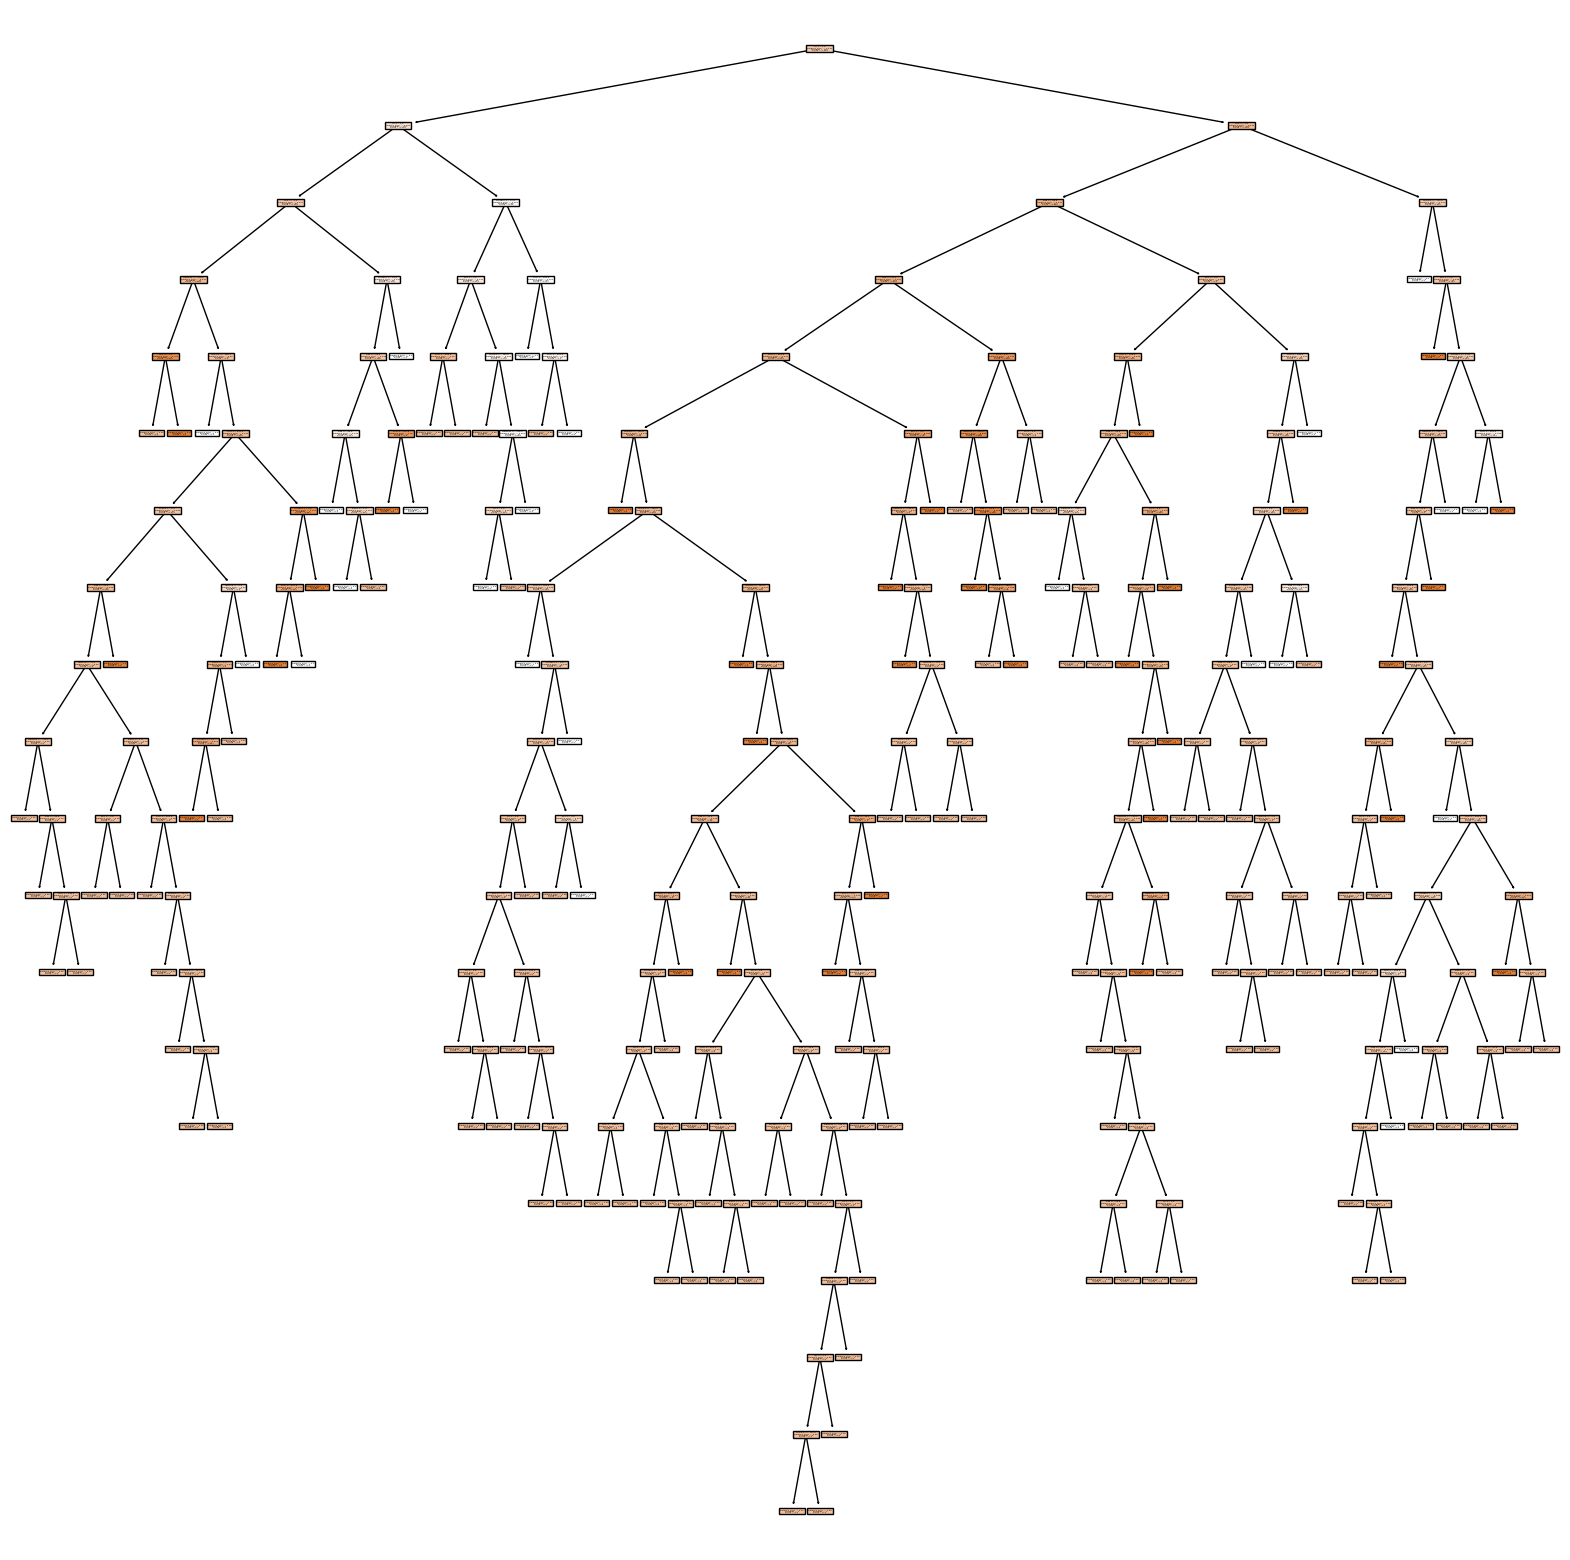

########################################
          ADAPTATIVE BOOSTING           
Mean Squared Error = 0.2887
Absolute Error = 0.5373
########################################


In [29]:
loo = LeaveOneOut()
loo.get_n_splits(X)

for i, model in enumerate(models):
    print(f'#'*40)
    print(f'{model_names[i].upper():^40}')
    mae = 0
    mse = 0
    for train, test in loo.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        
        model.fit(X_train, y_train)
        
        prediction = model.predict(X_test)

        mse = round(mean_squared_error(y_test, prediction), 4)
        mae = round(mean_absolute_error(y_test, prediction), 4)
    
    print(f"Mean Squared Error = {mse}")
    print(f"Absolute Error = {mae}")
    
    if model_names[i] == 'Decision Trees':
        plt.figure(figsize=(20,20))
        plot_tree(model, filled=True, feature_names=list(X.columns))
        plt.savefig('decision_tree_recursion_loo.svg', format='svg')
        plt.show()
        
print('#'*40)

## Create dataset for new predictions

In [99]:
new_data = [
    [20, 1, 1, 140, 200, 1, 0, 150, 1, 0.5, 2, 4, 2],
    [30, 0, 2, 150, 215, 2, 1, 170, 0, 2.0, 2, 1, 3],
    [40, 0, 2, 145, 200, 0, 2, 190, 0, 2.5, 2, 3, 3]
]

function = lambda x: 'Ataque Cardíaco' if x > 0.75 else 'Sem Ataque Cardíaco'

print("#"*40)
for i, model in enumerate(models):
    new_dataset = pd.DataFrame(
        data=new_data,
        columns=[
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal'
        ]
    )

    new_dataset['target'] = models[i].predict(new_dataset)
    new_dataset['Ataque'] = new_dataset['target'].apply(function)

    print(model_names[i].upper())
    print(new_dataset[['target', 'Ataque']].head())
    print("#"*40)

########################################
LINEAR REGRESSION
     target               Ataque
0  0.338818  Sem Ataque Cardíaco
1  0.722815  Sem Ataque Cardíaco
2  0.657503  Sem Ataque Cardíaco
########################################
K NEAREST NEIGHBORS
     target               Ataque
0  0.780000      Ataque Cardíaco
1  0.426667  Sem Ataque Cardíaco
2  0.796667      Ataque Cardíaco
########################################
RANDOM FORESTS
     target               Ataque
0  0.694917  Sem Ataque Cardíaco
1  0.543243  Sem Ataque Cardíaco
2  0.430179  Sem Ataque Cardíaco
########################################
SUPPORT VECTOR MACHINES
     target               Ataque
0  0.599219  Sem Ataque Cardíaco
1  0.666682  Sem Ataque Cardíaco
2  0.775045      Ataque Cardíaco
########################################
DECISION TREES
     target               Ataque
0  0.796667      Ataque Cardíaco
1  0.162500  Sem Ataque Cardíaco
2  0.162500  Sem Ataque Cardíaco
########################################
AD

# Classification (Leave-one-out)

## Removing Duplicates

In [30]:
dataset_classification_one_out = df.drop_duplicates()

heart_attack = 0.75
dataset_classification_one_out['target'] = dataset_classification_one_out['target'].apply(
    lambda x: 1 if x >= heart_attack else 0
)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_4536\2543457998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_classification_one_out['target'] = dataset_classification_one_out['target'].apply(


In [31]:
X = dataset_classification_one_out.iloc[:, :13]
y = dataset_classification_one_out.iloc[:, 13]

## Defining Models

In [32]:
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

model_names = [
    'Logistic Regression',
    'Random Forest Classifier',
    'Decision Tree Classifier'
]

## Iterate over models and plot them

In [33]:
%%capture --no-stdout

loo = LeaveOneOut()
loo.get_n_splits(X)

for i, model in enumerate(models):
    print(f'#'*60)
    print(f'{model_names[i].upper():^60}')
    accuracy = 0
    conf_matrix = None
    class_report = None
    for train, test in loo.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        
        logistic = model_names[i] == 'Logistic Regression'
        if logistic:
            # Standardize features (optional but can be beneficial for logistic regression)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)

        model.fit(X_train, y_train)

        prediction = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, prediction)
        conf_matrix = confusion_matrix(y_test, prediction)
        class_report = classification_report(y_test, prediction)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix: \n{conf_matrix}")
    print(f"Classification Report: \n{class_report}")
    
    if model_names[i] == 'Decision Tree Classifier':
        plt.figure(figsize=(20,20))
        plot_tree(model, filled=True, feature_names=list(X.columns))
        plt.savefig('decision_tree_classifier_loo.svg', format='svg')
        plt.show()
        
print('#'*60)

############################################################
                    LOGISTIC REGRESSION                     
Accuracy: 1.0000
Confusion Matrix: 
[[1]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

############################################################
                  RANDOM FOREST CLASSIFIER                  
Accuracy: 0.0000
Confusion Matrix: 
[[0 1]
 [0 0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

###############

## Create dataset for new predictions

In [107]:
new_data = [
    [20, 1, 1, 140, 200, 1, 0, 150, 1, 0.5, 2, 4, 2],
    [30, 0, 2, 150, 215, 2, 1, 170, 0, 2.0, 2, 1, 3],
    [40, 0, 2, 145, 200, 0, 2, 190, 0, 2.5, 2, 3, 3]
]

function = lambda x: 'Ataque Cardíaco' if x == 1 else 'Sem Ataque Cardíaco'

print("#"*40)
for i, model in enumerate(models):
    new_dataset = pd.DataFrame(
        data=new_data,
        columns=[
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal'
        ]
    )

    new_dataset['target'] = models[i].predict(new_dataset)
    new_dataset['Ataque'] = new_dataset['target'].apply(function)

    print(f'{model_names[i].upper():^40}')
    print(new_dataset[['target', 'Ataque']].head())
    print("#"*40)

########################################
          LOGISTIC REGRESSION           
   target           Ataque
0       1  Ataque Cardíaco
1       1  Ataque Cardíaco
2       1  Ataque Cardíaco
########################################
        RANDOM FOREST CLASSIFIER        
   target               Ataque
0       1      Ataque Cardíaco
1       0  Sem Ataque Cardíaco
2       0  Sem Ataque Cardíaco
########################################
        DECISION TREE CLASSIFIER        
   target               Ataque
0       1      Ataque Cardíaco
1       0  Sem Ataque Cardíaco
2       1      Ataque Cardíaco
########################################


c:\Users\Arthur\Desktop\Nova pasta\Trab1-MachineLearning\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# REFS

- Holdout
    - Regression
        - https://www.kaggle.com/code/sathishgsmss/heart-attack-prediction
        - https://www.kaggle.com/code/shreya2k/heart-attack-prediction-random-forest-classifier/notebook
    - Classification
        - https://www.kaggle.com/code/adityasingh1231/heart-attack-prediction-and-analysis-with-accuracy/notebook
- Regression
    - https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html
    